# 참고

[프로그래머를 위한 베이지안 with 파이썬](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

In [1]:
# import os
# import io
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import scipy.stats as stats

In [24]:
베타연속확률변수 = stats.beta

동전의_던진_횟수들 = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

# 동전 던지기 결과
동전던지기확률 = 0.5
베르누이이산확률변수 =  stats.bernoulli.rvs(동전던지기확률, size=동전의_던진_횟수들[-1])

_0부터1까지일정한간격의100개의숫자 = np.linspace(0, 1, 100)

In [25]:
베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 동전의_던진_횟수들[7] - 앞면이나온횟수)

array([0.00000000e+00, 7.76302218e-08, 4.53024540e-06, 4.70072420e-05,
       2.40363512e-04, 8.33617559e-04, 2.26073774e-03, 5.17219430e-03,
       1.04450037e-02, 1.91705153e-02, 3.26216711e-02, 5.22031015e-02,
       7.93883719e-02, 1.15649117e-01, 1.62380805e-01, 2.20829594e-01,
       2.92024220e-01, 3.76716242e-01, 4.75331227e-01, 5.87932725e-01,
       7.14200157e-01, 8.53421025e-01, 1.00449726e+00, 1.16596494e+00,
       1.33602617e+00, 1.51259157e+00, 1.69333145e+00, 1.87573377e+00,
       2.05716664e+00, 2.23494321e+00, 2.40638710e+00, 2.56889600e+00,
       2.72000210e+00, 2.85742740e+00, 2.97913276e+00, 3.08335960e+00,
       3.16866331e+00, 3.23393804e+00, 3.27843245e+00, 3.30175650e+00,
       3.30387949e+00, 3.28511992e+00, 3.24612761e+00, 3.18785913e+00,
       3.11154732e+00, 3.01866602e+00, 2.91089113e+00, 2.79005899e+00,
       2.65812350e+00, 2.51711272e+00, 2.36908636e+00, 2.21609482e+00,
       2.06014092e+00, 1.90314487e+00, 1.74691321e+00, 1.59311223e+00,
      

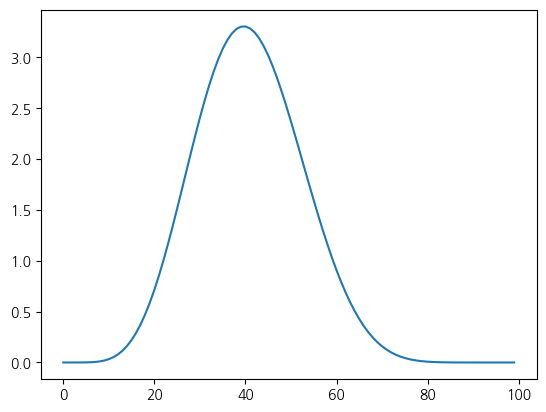

In [18]:
앞면이나온횟수 = 베르누이이산확률변수[:동전의_던진_횟수들[7]].sum()

plt.plot(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 동전의_던진_횟수들[7] - 앞면이나온횟수))

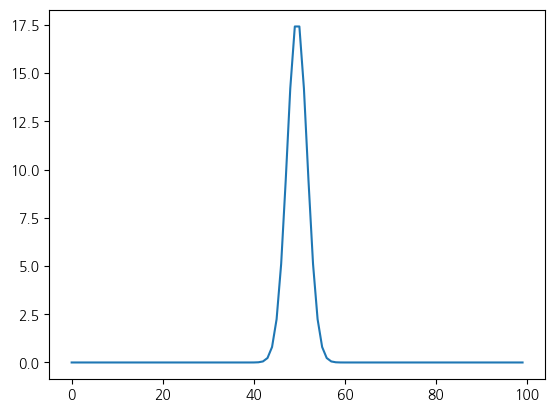

In [6]:
앞면이나온횟수 = 베르누이이산확률변수[:500].sum()

plt.plot(베타연속확률변수.pdf(_0부터1까지일정한간격의100개의숫자, 1 + 앞면이나온횟수, 1 + 500 - 앞면이나온횟수))

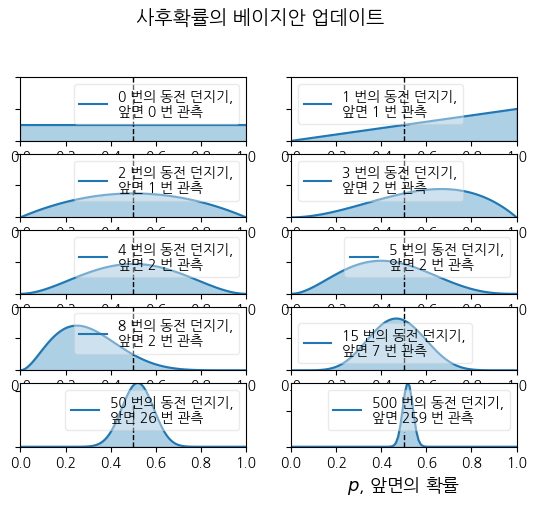

<Figure size 4000x2000 with 0 Axes>

In [8]:
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials) / 2), 2, k + 1)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)
plt.figure(figsize=(40, 20))
plt.tight_layout()